In [ ]:
#importing libraries
import sys
import pandas as pd
import sklearn
import keras

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
#loading dataset
data= pd.read_csv("/content/drive/MyDrive/Autism_disorder/Autism-Adult-Data.csv",na_values=['?'])

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd
print(pd.DataFrame(data).isnull().sum())  # Check missing values per feature


A1_Score            0
A2_Score            0
A3_Score            0
A4_Score            0
A5_Score            0
A6_Score            0
A7_Score            0
A8_Score            0
A9_Score            0
A10_Score           0
age                 2
gender              0
ethnicity          95
jundice             0
austim              0
country_of_res      0
used_app_before     0
result              0
age_desc            0
relation           95
Class/ASD           0
dtype: int64


In [ ]:
data['age'].fillna(data['age'].median(), inplace=True)  # Use Median


<ipython-input-109-95ccf2089c5c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['age'].fillna(data['age'].median(), inplace=True)  # Use Median


In [ ]:
print(data.isnull().sum())


A1_Score            0
A2_Score            0
A3_Score            0
A4_Score            0
A5_Score            0
A6_Score            0
A7_Score            0
A8_Score            0
A9_Score            0
A10_Score           0
age                 0
gender              0
ethnicity          95
jundice             0
austim              0
country_of_res      0
used_app_before     0
result              0
age_desc            0
relation           95
Class/ASD           0
dtype: int64


In [ ]:
print("Number of duplicate rows:", data.duplicated().sum())
data = data.drop_duplicates()
print("Number of duplicate rows:", data.duplicated().sum())


Number of duplicate rows: 5
Number of duplicate rows: 0


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Assume 'data' is your dataset
y = data['Class/ASD']

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Encode categorical features
categorical_features = data.select_dtypes(include=['object']).columns

for feature in categorical_features:
    if feature != 'Class/ASD':  # Exclude target variable
        le = LabelEncoder()
        data[feature] = le.fit_transform(data[feature])

# Feature names (excluding target)
feature_names = data.drop(columns=['Class/ASD']).columns

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(data.drop('Class/ASD', axis=1), y)

# Get feature importance
feature_importances = rf.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]  # Sort descending

# Print feature names with their importance scores
print("Feature Importance Ranking:")
for i in range(15):  # Show top 10
    feature_name = feature_names[sorted_indices[i]]
    importance_score = feature_importances[sorted_indices[i]]
    print(f"{i+1}. {feature_name}: {importance_score:.4f}")


Feature Importance Ranking:
1. result: 0.5553
2. A9_Score: 0.1029
3. A5_Score: 0.0773
4. A6_Score: 0.0613
5. A3_Score: 0.0379
6. A4_Score: 0.0334
7. A7_Score: 0.0228
8. A10_Score: 0.0206
9. A2_Score: 0.0147
10. ethnicity: 0.0138
11. A1_Score: 0.0132
12. age: 0.0121
13. country_of_res: 0.0119
14. A8_Score: 0.0115
15. relation: 0.0047


**IMPORTING LIBRARIES**

In [ ]:
!pip install tensorflow
import tensorflow as tf

In [ ]:
# Core Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Scikit-Learn Components
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, log_loss, confusion_matrix
)

# Keras Components
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (
    Dense, Dropout, BatchNormalization,
    Input, Add, Activation, LSTM
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical

# Imbalanced Learning
from imblearn.over_sampling import SMOTE

**SELECTED FEATURES**

In [ ]:
selected_features = [
    "A1_Score", "A2_Score", "A3_Score", "A4_Score", "A5_Score",
    "A6_Score", "A7_Score", "A8_Score", "A9_Score", "A10_Score",
    "age", "country_of_res"
]

**X AND Y INPUT**

In [ ]:
# Convert scores and prepare data
for feature in selected_features:
    if '_Score' in feature:
        data[feature] = data[feature].astype(int)

X = pd.get_dummies(data[selected_features])
y = data['Class/ASD'].map({'YES': 1, 'NO': 0})

**DENSE MODEL**

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 1/15 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.7500 - loss: 0.5713

15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.7884 - loss: 0.5332 - val_accuracy: 0.8087 - val_loss: 0.4278
Epoch 2/50
 1/15 ━━━━━━━━━━━━━━━━━━━━ 3s 283ms/step - accuracy: 0.9375 - loss: 0.3922

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9258 - loss: 0.3509 - val_accuracy: 0.8696 - val_loss: 0.3176
Epoch 3/50
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9688 - loss: 0.2362

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9591 - loss: 0.2373 - val_accuracy: 0.9130 - val_loss: 0.2416
Epoch 4/50
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 1.0000 - loss: 0.1730

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9828 - loss: 0.1598 - val_accuracy: 0.9130 - val_loss: 0.1918
Epoch 5/50
 1/15 ━━━━━━━━━━━━━━━━━━━━ 2s 159ms/step - accuracy: 0.9688 - loss: 0.1015

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9804 - loss: 0.1123 - val_accuracy: 0.9130 - val_loss: 0.1658
Epoch 6/50
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 1.0000 - loss: 0.0951

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9955 - loss: 0.0817 - val_accuracy: 0.9391 - val_loss: 0.1502
Epoch 7/50
13/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9936 - loss: 0.0660 

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9931 - loss: 0.0663 - val_accuracy: 0.9391 - val_loss: 0.1413
Epoch 8/50
 1/15 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 1.0000 - loss: 0.0476

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9941 - loss: 0.0540 - val_accuracy: 0.9391 - val_loss: 0.1296
Epoch 9/50
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 1.0000 - loss: 0.0450

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9993 - loss: 0.0469 - val_accuracy: 0.9478 - val_loss: 0.1254
Epoch 10/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9992 - loss: 0.0321 

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9991 - loss: 0.0324 - val_accuracy: 0.9478 - val_loss: 0.1209
Epoch 11/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.0323 - val_accuracy: 0.9478 - val_loss: 0.1217
Epoch 12/50
12/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0259 

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 1.0000 - loss: 0.0262 - val_accuracy: 0.9478 - val_loss: 0.1159
Epoch 13/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 1.0000 - loss: 0.0242 - val_accuracy: 0.9478 - val_loss: 0.1171
Epoch 14/50
12/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.0197

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 1.0000 - loss: 0.0198 - val_accuracy: 0.9478 - val_loss: 0.1139
Epoch 15/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 0.0186 - val_accuracy: 0.9478 - val_loss: 0.1151
Epoch 16/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 0.0173 - val_accuracy: 0.9478 - val_loss: 0.1194
Epoch 17/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 0.0141 - val_accuracy: 0.9478 - val_loss: 0.1173
Epoch 18/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 0.0123 - val_accuracy: 0.9478 - val_loss: 0.1174
Epoch 19/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.0101 - val_accuracy: 0.9478 - val_loss: 0.1213
Epoch 20/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0088 - val_accuracy: 0.9478 - val_loss: 0.1216
Epoch 21/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.0062 - val_accuracy: 0.9565 - val_lo

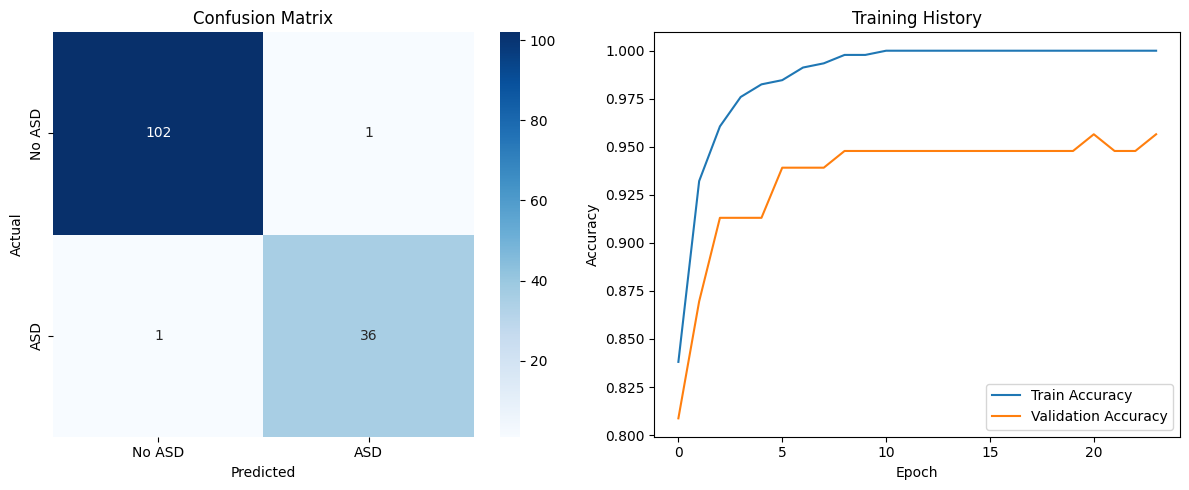

In [ ]:
# Split Data Before Scaling & Oversampling
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Apply SMOTE (Sampling strategy adjusted to prevent overfitting)
smote = SMOTE(sampling_strategy=0.4, random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Feature Scaling (AFTER splitting to avoid data leakage)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build Dense Model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile Model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ModelCheckpoint('best_dense_model.h5', save_best_only=True)
]

# Train Model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=callbacks,
    verbose=1
)

# Evaluate Model
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

# Generate Predictions
y_pred_probs = model.predict(X_test)
y_pred_classes = (y_pred_probs > 0.5).astype(int)

# Compute Metrics
dense_metrics = {
    'Accuracy (%)': accuracy_score(y_test, y_pred_classes) * 100,
    'Precision (%)': precision_score(y_test, y_pred_classes) * 100,
    'Recall (%)': recall_score(y_test, y_pred_classes) * 100,
    'F1 Score (%)': f1_score(y_test, y_pred_classes) * 100,
    'ROC AUC (%)': roc_auc_score(y_test, y_pred_probs) * 100,
    'Log Loss': log_loss(y_test, y_pred_probs),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_classes)
}

# Print Corrected Metrics in Tabular Format
print("\nTraining Accuracy: {:.2f}%".format(train_acc * 100))
print("Testing Accuracy: {:.2f}%\n".format(test_acc * 100))

print("{:<20} {:<10}".format("Metric", "Value"))
print("=" * 35)
for metric, value in dense_metrics.items():
    if metric != 'Confusion Matrix':
        print("{:<20} {:.2f}".format(metric, value))

# Visualization
plt.figure(figsize=(12, 5))

# Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(dense_metrics['Confusion Matrix'], annot=True, fmt="d", cmap="Blues",
            xticklabels=["No ASD", "ASD"], yticklabels=["No ASD", "ASD"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Training History
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training History')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

**DROPOUT MODEL**

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.5525 - loss: 0.6988 - val_accuracy: 0.8841 - val_loss: 0.4965
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7977 - loss: 0.5003 - val_accuracy: 0.9085 - val_loss: 0.3179
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8590 - loss: 0.3809 - val_accuracy: 0.9085 - val_loss: 0.2243
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8688 - loss: 0.3210 - val_accuracy: 0.9207 - val_loss: 0.2007
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8924 - loss: 0.2798 - val_accuracy: 0.9268 - val_loss: 0.1894
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9103 - loss: 0.2395 - val_accuracy: 0.9329 - val_loss: 0.1818
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9089 - loss: 0.2147 - val_accuracy: 0.9329 - val_loss: 0.1835
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9256 - loss: 0.1989 - val_accuracy: 0.9329 - val_loss: 0.1810

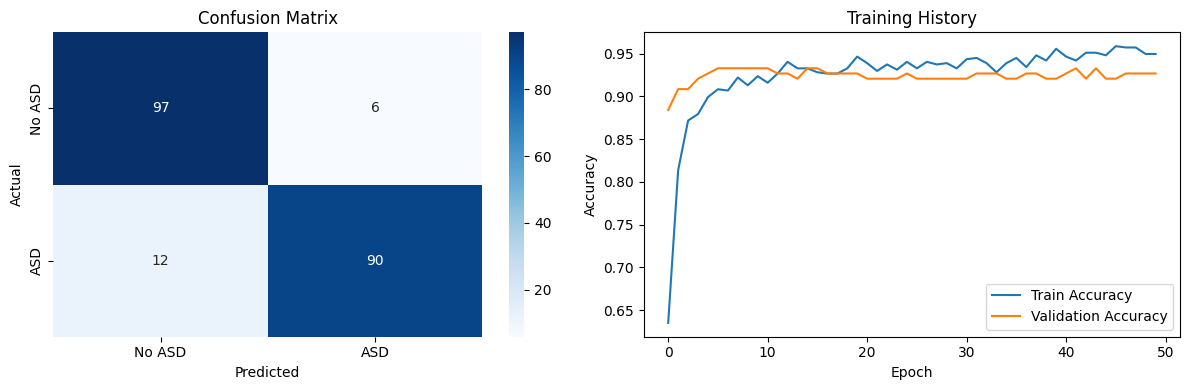

In [ ]:


# Handle class imbalance
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42, stratify=y_res
)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build model
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.4),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Evaluate model
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

# Generate predictions
y_pred_probs = model.predict(X_test)
y_pred_classes = (y_pred_probs > 0.5).astype(int)

# Calculate metrics
dropout_metrics = {
    'Accuracy (%)': accuracy_score(y_test, y_pred_classes) * 100,
    'Precision (%)': precision_score(y_test, y_pred_classes) * 100,
    'Recall (%)': recall_score(y_test, y_pred_classes) * 100,
    'F1 Score (%)': f1_score(y_test, y_pred_classes) * 100,
    'ROC AUC (%)': roc_auc_score(y_test, y_pred_probs) * 100,
    'Log Loss': log_loss(y_test, y_pred_probs),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_classes)
}

# Print results
print(f"\nTraining Accuracy: {train_acc*100:.2f}%")
print(f"Testing Accuracy: {test_acc*100:.2f}%")
print("\nDetailed Metrics:")
for metric, value in dropout_metrics.items():
    if metric != 'Confusion Matrix':
        print(f"{metric}: {value:.2f}")

# Visualization
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.heatmap(metrics['Confusion Matrix'], annot=True, fmt="d", cmap="Blues",
            xticklabels=["No ASD", "ASD"], yticklabels=["No ASD", "ASD"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training History')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.tight_layout()
plt.show()

**BATCH NORMALIZATION**

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.5724 - loss: 0.8966 - val_accuracy: 0.9024 - val_loss: 0.4649
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8408 - loss: 0.3682 - val_accuracy: 0.8841 - val_loss: 0.3575
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8990 - loss: 0.2540 - val_accuracy: 0.8780 - val_loss: 0.3113
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9095 - loss: 0.2161 - val_accuracy: 0.8720 - val_loss: 0.2828
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9121 - loss: 0.2063 - val_accuracy: 0.8780 - val_loss: 0.2615
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9217 - loss: 0.2021 - val_accuracy: 0.8841 - val_loss: 0.2442
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9363 - loss: 0.1744 - val_accuracy: 0.8720 - val_loss: 0.2371
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9242 - loss: 0.1648 - val_accuracy: 0.8841 - val_loss: 0.2277
Ep

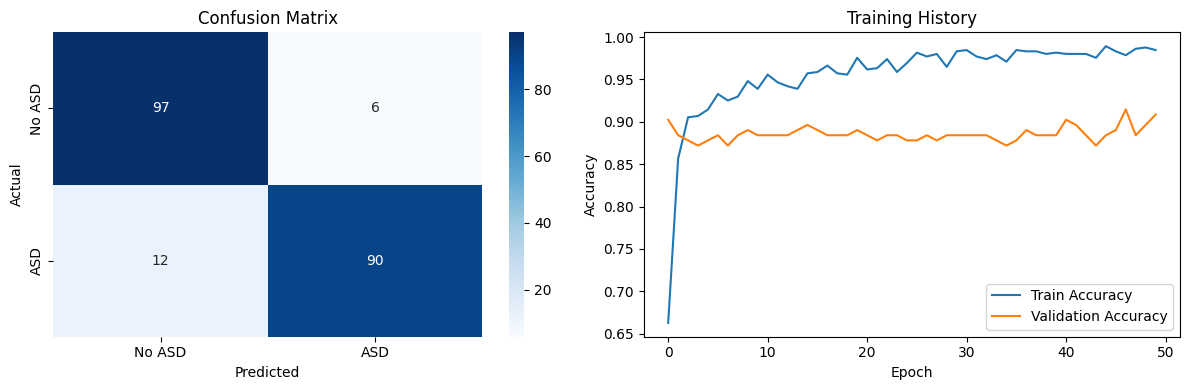

In [ ]:

# Handle class imbalance
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Convert to one-hot encoding for categorical crossentropy
y_res = to_categorical(y_res)  # 🔥 Critical change for softmax

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res,
    test_size=0.2,
    random_state=42,
    stratify=y_res  # Stratify on original class distribution
)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ==============================================================
# Batch Normalization Model
# ==============================================================
batch_norm_model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    BatchNormalization(),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dense(2, activation='softmax')  # 2 units for one-hot encoding
])

# Compile with lower learning rate
batch_norm_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train model
history = batch_norm_model.fit(
    X_train, y_train,
    epochs=50,  # Increased epochs for better convergence
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Evaluate
train_loss, train_acc = batch_norm_model.evaluate(X_train, y_train, verbose=0)
test_loss, test_acc = batch_norm_model.evaluate(X_test, y_test, verbose=0)

# Generate predictions
y_pred_probs = batch_norm_model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Convert y_test back from one-hot for metrics
y_test_labels = np.argmax(y_test, axis=1)

# Calculate metrics
batch_norm_metrics = {
    'Accuracy (%)': accuracy_score(y_test_labels, y_pred_classes) * 100,
    'Precision (%)': precision_score(y_test_labels, y_pred_classes) * 100,
    'Recall (%)': recall_score(y_test_labels, y_pred_classes) * 100,
    'F1 Score (%)': f1_score(y_test_labels, y_pred_classes) * 100,
    'ROC AUC (%)': roc_auc_score(y_test_labels, y_pred_probs[:, 1]) * 100,  # Use probability for ROC AUC
    'Log Loss': log_loss(y_test_labels, y_pred_probs),
    'Confusion Matrix': confusion_matrix(y_test_labels, y_pred_classes)
}
# Print results
print(f"\nTraining Accuracy: {train_acc*100:.2f}%")
print(f"Testing Accuracy: {test_acc*100:.2f}%")
print("\nDetailed Metrics:")
for metric, value in batch_norm_metrics.items():
    if metric != 'Confusion Matrix':
        print(f"{metric}: {value:.2f}")

# Visualization
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.heatmap(metrics['Confusion Matrix'], annot=True, fmt="d", cmap="Blues",
            xticklabels=["No ASD", "ASD"], yticklabels=["No ASD", "ASD"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training History')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.tight_layout()
plt.show()

**LSTM**

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 73ms/step - accuracy: 0.7274 - loss: 0.6417 - val_accuracy: 0.9268 - val_loss: 0.3870
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8655 - loss: 0.3711 - val_accuracy: 0.9268 - val_loss: 0.2261
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8918 - loss: 0.2680 - val_accuracy: 0.9146 - val_loss: 0.2299
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8947 - loss: 0.2418 - val_accuracy: 0.9207 - val_loss: 0.1699
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9183 - loss: 0.2112 - val_accuracy: 0.9146 - val_loss: 0.1627
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8981 - loss: 0.2331 - val_accuracy: 0.9207 - val_loss: 0.1739
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9064 - loss: 0.2098 - val_accuracy: 0.9207 - val_loss: 0.1603
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8817 - loss: 0.2291 - val_accuracy: 0.9085 - val_loss: 0.

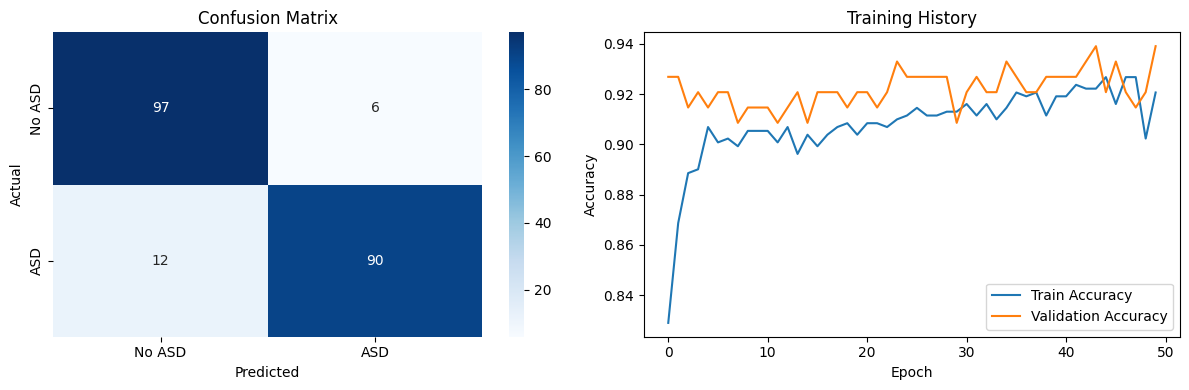

In [ ]:

# Handle class imbalance
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42, stratify=y_res
)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape data for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build LSTM model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.4),
    LSTM(32),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Evaluate model
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

# Generate predictions
y_pred_probs = model.predict(X_test)
y_pred_classes = (y_pred_probs > 0.5).astype(int)

# Calculate metrics
lstm_metrics = {
    'Accuracy (%)': accuracy_score(y_test, y_pred_classes) * 100,
    'Precision (%)': precision_score(y_test, y_pred_classes) * 100,
    'Recall (%)': recall_score(y_test, y_pred_classes) * 100,
    'F1 Score (%)': f1_score(y_test, y_pred_classes) * 100,
    'ROC AUC (%)': roc_auc_score(y_test, y_pred_probs) * 100,
    'Log Loss': log_loss(y_test, y_pred_probs),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_classes)
}

# Print results
print(f"\nTraining Accuracy: {train_acc*100:.2f}%")
print(f"Testing Accuracy: {test_acc*100:.2f}%")
print("\nDetailed Metrics:")
for metric, value in lstm_metrics.items():
    if metric != 'Confusion Matrix':
        print(f"{metric}: {value:.2f}")

# Visualization
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.heatmap(metrics['Confusion Matrix'], annot=True, fmt="d", cmap="Blues",
            xticklabels=["No ASD", "ASD"], yticklabels=["No ASD", "ASD"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training History')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.tight_layout()
plt.show()

**RESIDUAL MODEL**

Epoch 1/50
20/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6044 - loss: 0.7746

21/21 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - accuracy: 0.6057 - loss: 0.7700 - val_accuracy: 0.3537 - val_loss: 0.7244
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6709 - loss: 0.6272 - val_accuracy: 0.3476 - val_loss: 0.7460
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7424 - loss: 0.5386

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7432 - loss: 0.5371 - val_accuracy: 0.4390 - val_loss: 0.7229
Epoch 4/50
19/21 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7746 - loss: 0.4927

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.7770 - loss: 0.4884 - val_accuracy: 0.5000 - val_loss: 0.6772
Epoch 5/50
19/21 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8249 - loss: 0.3922

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.8257 - loss: 0.3910 - val_accuracy: 0.5427 - val_loss: 0.6324
Epoch 6/50
20/21 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8364 - loss: 0.3596

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8367 - loss: 0.3590 - val_accuracy: 0.6768 - val_loss: 0.5821
Epoch 7/50
20/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8703 - loss: 0.3259

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8714 - loss: 0.3254 - val_accuracy: 0.7012 - val_loss: 0.5367
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8914 - loss: 0.3047

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8910 - loss: 0.3050 - val_accuracy: 0.7622 - val_loss: 0.4974
Epoch 9/50
20/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9060 - loss: 0.2733

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9057 - loss: 0.2730 - val_accuracy: 0.7988 - val_loss: 0.4610
Epoch 10/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9065 - loss: 0.2704

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9065 - loss: 0.2700 - val_accuracy: 0.8171 - val_loss: 0.4319
Epoch 11/50
19/21 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8928 - loss: 0.2793

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8944 - loss: 0.2766 - val_accuracy: 0.8171 - val_loss: 0.3991
Epoch 12/50
19/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8909 - loss: 0.2650

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8924 - loss: 0.2639 - val_accuracy: 0.8659 - val_loss: 0.3580
Epoch 13/50
20/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9285 - loss: 0.2093

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9282 - loss: 0.2104 - val_accuracy: 0.8720 - val_loss: 0.3261
Epoch 14/50
18/21 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9418 - loss: 0.2051

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9402 - loss: 0.2074 - val_accuracy: 0.8780 - val_loss: 0.3108
Epoch 15/50
20/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9475 - loss: 0.1745

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9456 - loss: 0.1764 - val_accuracy: 0.8902 - val_loss: 0.2924
Epoch 16/50
20/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9135 - loss: 0.2218

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9136 - loss: 0.2218 - val_accuracy: 0.8780 - val_loss: 0.2676
Epoch 17/50
20/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9280 - loss: 0.1894

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9273 - loss: 0.1904 - val_accuracy: 0.8841 - val_loss: 0.2662
Epoch 18/50
20/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9380 - loss: 0.1784

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9377 - loss: 0.1790 - val_accuracy: 0.8841 - val_loss: 0.2562
Epoch 19/50
20/21 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9462 - loss: 0.1666

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9450 - loss: 0.1677 - val_accuracy: 0.8841 - val_loss: 0.2468
Epoch 20/50
20/21 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9116 - loss: 0.2194

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9126 - loss: 0.2181 - val_accuracy: 0.8902 - val_loss: 0.2427
Epoch 21/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9244 - loss: 0.1919

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9244 - loss: 0.1920 - val_accuracy: 0.8902 - val_loss: 0.2419
Epoch 22/50
19/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9350 - loss: 0.1646

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9341 - loss: 0.1676 - val_accuracy: 0.8902 - val_loss: 0.2325
Epoch 23/50
19/21 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9483 - loss: 0.1477

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9475 - loss: 0.1488 - val_accuracy: 0.8963 - val_loss: 0.2252
Epoch 24/50
19/21 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9252 - loss: 0.1951

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9258 - loss: 0.1938 - val_accuracy: 0.8841 - val_loss: 0.2221
Epoch 25/50
19/21 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9215 - loss: 0.1894

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9241 - loss: 0.1860 - val_accuracy: 0.8963 - val_loss: 0.2221
Epoch 26/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9579 - loss: 0.1400

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9575 - loss: 0.1406 - val_accuracy: 0.8902 - val_loss: 0.2197
Epoch 27/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9359 - loss: 0.1613 - val_accuracy: 0.8841 - val_loss: 0.2213
Epoch 28/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9601 - loss: 0.1348

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9600 - loss: 0.1355 - val_accuracy: 0.8963 - val_loss: 0.2159
Epoch 29/50
17/21 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9385 - loss: 0.1826

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9421 - loss: 0.1746 - val_accuracy: 0.9085 - val_loss: 0.2110
Epoch 30/50
19/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9334 - loss: 0.1740

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9338 - loss: 0.1730 - val_accuracy: 0.8841 - val_loss: 0.2086
Epoch 31/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9545 - loss: 0.1387

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9541 - loss: 0.1389 - val_accuracy: 0.9024 - val_loss: 0.2052
Epoch 32/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9503 - loss: 0.1471

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9504 - loss: 0.1469 - val_accuracy: 0.9146 - val_loss: 0.2016
Epoch 33/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9699 - loss: 0.1207

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9690 - loss: 0.1221 - val_accuracy: 0.8963 - val_loss: 0.1997
Epoch 34/50
18/21 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9640 - loss: 0.1218

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9631 - loss: 0.1220 - val_accuracy: 0.9024 - val_loss: 0.1909
Epoch 35/50
20/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9718 - loss: 0.1144

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9710 - loss: 0.1156 - val_accuracy: 0.9024 - val_loss: 0.1864
Epoch 36/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9561 - loss: 0.1156 - val_accuracy: 0.9024 - val_loss: 0.1877
Epoch 37/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9566 - loss: 0.1291 - val_accuracy: 0.8963 - val_loss: 0.1904
Epoch 38/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9573 - loss: 0.1239 - val_accuracy: 0.8963 - val_loss: 0.1993
Epoch 39/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9588 - loss: 0.1227 - val_accuracy: 0.8963 - val_loss: 0.2060
Epoch 40/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9529 - loss: 0.1290 - val_accuracy: 0.8841 - val_loss: 0.2012
Epoch 41/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9583 - loss: 0.1116 - val_accuracy: 0.8841 - val_loss: 0.2047
Epoch 42/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9627 - loss: 0.1128 - val_accuracy: 0.8902 - val_l

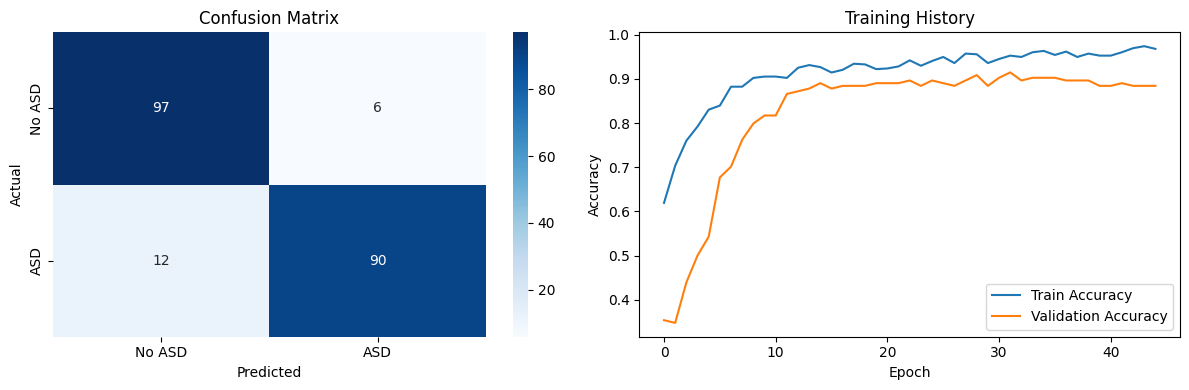

In [ ]:
# Handle Class Imbalance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Residual Block Function
def residual_block(x, units, dropout_rate=0.3):
    shortcut = x
    if x.shape[-1] != units:
        shortcut = Dense(units)(shortcut)
        shortcut = BatchNormalization()(shortcut)

    x = Dense(units)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(dropout_rate)(x)

    x = Dense(units)(x)
    x = BatchNormalization()(x)
    x = Add()([shortcut, x])
    return Activation('relu')(x)

# Build Model
input_layer = Input(shape=(X_train.shape[1],))
x = Dense(256)(input_layer)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = residual_block(x, 256)
x = residual_block(x, 128)
x = residual_block(x, 64)
x = residual_block(x, 32)

output_layer = Dense(1, activation='sigmoid')(x)
model = Model(inputs=input_layer, outputs=output_layer)

# Compile Model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ModelCheckpoint('best_model.h5', save_best_only=True)
]

# Train Model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=callbacks,
    verbose=1
)

# Evaluate Model
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

# Generate Predictions
y_pred_probs = model.predict(X_test)
y_pred_classes = (y_pred_probs > 0.5).astype(int)

# Calculate Metrics
residual_metrics = {
    'Accuracy (%)': accuracy_score(y_test, y_pred_classes) * 100,
    'Precision (%)': precision_score(y_test, y_pred_classes) * 100,
    'Recall (%)': recall_score(y_test, y_pred_classes) * 100,
    'F1 Score (%)': f1_score(y_test, y_pred_classes) * 100,
    'ROC AUC (%)': roc_auc_score(y_test, y_pred_probs) * 100,
    'Log Loss': log_loss(y_test, y_pred_probs),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_classes)
}

# Print Results
print(f"\nTraining Accuracy: {train_acc*100:.2f}%")
print(f"Testing Accuracy: {test_acc*100:.2f}%")
print("\nDetailed Metrics:")
for metric, value in residual_metrics.items():
    if metric != 'Confusion Matrix':
        print(f"{metric}: {value:.2f}")

# Visualization
plt.figure(figsize=(12, 4))

# Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(metrics['Confusion Matrix'], annot=True, fmt="d", cmap="Blues",
            xticklabels=["No ASD", "ASD"], yticklabels=["No ASD", "ASD"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Training History
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training History')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

**SIGMOID MODEL**

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5777 - loss: 0.7341

11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.5878 - loss: 0.7214 - val_accuracy: 0.9512 - val_loss: 0.4759
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8997 - loss: 0.2753  

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9003 - loss: 0.2734 - val_accuracy: 0.8902 - val_loss: 0.4011
Epoch 3/100
10/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9485 - loss: 0.1805 

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9472 - loss: 0.1816 - val_accuracy: 0.8841 - val_loss: 0.3467
Epoch 4/100
10/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9526 - loss: 0.1459  

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9521 - loss: 0.1474 - val_accuracy: 0.8841 - val_loss: 0.3095
Epoch 5/100
10/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9524 - loss: 0.1424 

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9534 - loss: 0.1410 - val_accuracy: 0.8780 - val_loss: 0.2832
Epoch 6/100
10/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9394 - loss: 0.1525 

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9411 - loss: 0.1498 - val_accuracy: 0.8841 - val_loss: 0.2718
Epoch 7/100
10/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9576 - loss: 0.1177 

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9573 - loss: 0.1177 - val_accuracy: 0.8963 - val_loss: 0.2626
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9473 - loss: 0.1202  

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9477 - loss: 0.1200 - val_accuracy: 0.8902 - val_loss: 0.2446
Epoch 9/100
10/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9468 - loss: 0.1319 

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9485 - loss: 0.1296 - val_accuracy: 0.8902 - val_loss: 0.2372
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9728 - loss: 0.0968 - val_accuracy: 0.8902 - val_loss: 0.2382
Epoch 11/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9503 - loss: 0.1079 

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9502 - loss: 0.1079 - val_accuracy: 0.8841 - val_loss: 0.2327
Epoch 12/100
10/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9586 - loss: 0.1027  

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9568 - loss: 0.1081 - val_accuracy: 0.8841 - val_loss: 0.2267
Epoch 13/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9521 - loss: 0.1089 - val_accuracy: 0.9024 - val_loss: 0.2315
Epoch 14/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9702 - loss: 0.0987 - val_accuracy: 0.8963 - val_loss: 0.2329
Epoch 15/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9710 - loss: 0.0894 - val_accuracy: 0.8902 - val_loss: 0.2407
Epoch 16/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9769 - loss: 0.0826 - val_accuracy: 0.8780 - val_loss: 0.2392
Epoch 17/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9598 - loss: 0.1035 - val_accuracy: 0.8780 - val_loss: 0.2395
Epoch 18/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9666 - loss: 0.0953 - val_accuracy: 0.8963 - val_loss: 0.2294
Epoch 19/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9738 - loss: 0.0785 - val_accuracy: 0.8902 

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9729 - loss: 0.0868 - val_accuracy: 0.8963 - val_loss: 0.2263
Epoch 21/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9679 - loss: 0.0922 - val_accuracy: 0.8902 - val_loss: 0.2446
Epoch 22/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9648 - loss: 0.0853 - val_accuracy: 0.8902 - val_loss: 0.2502
Epoch 23/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9649 - loss: 0.0730 - val_accuracy: 0.8780 - val_loss: 0.2542
Epoch 24/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9776 - loss: 0.0631 - val_accuracy: 0.8841 - val_loss: 0.2614
Epoch 25/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9778 - loss: 0.0606 - val_accuracy: 0.8780 - val_loss: 0.2730
Epoch 26/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9778 - loss: 0.0667 - val_accuracy: 0.8841 - val_loss: 0.2489
Epoch 27/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9770 - loss: 0.0749 - val_accuracy: 0.8841 

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9687 - loss: 0.0802 - val_accuracy: 0.8841 - val_loss: 0.2203
Epoch 29/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9851 - loss: 0.0605 - val_accuracy: 0.8902 - val_loss: 0.2299
Epoch 30/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9795 - loss: 0.0629 - val_accuracy: 0.8963 - val_loss: 0.2354
Epoch 31/100
10/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9728 - loss: 0.0693  

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9725 - loss: 0.0712 - val_accuracy: 0.9085 - val_loss: 0.2162
Epoch 32/100
 8/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9857 - loss: 0.0433  

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9833 - loss: 0.0475 - val_accuracy: 0.9024 - val_loss: 0.2096
Epoch 33/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9761 - loss: 0.0637 

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9760 - loss: 0.0642 - val_accuracy: 0.9146 - val_loss: 0.2091
Epoch 34/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9871 - loss: 0.0450 - val_accuracy: 0.9146 - val_loss: 0.2317
Epoch 35/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9862 - loss: 0.0565 - val_accuracy: 0.8841 - val_loss: 0.2685
Epoch 36/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9690 - loss: 0.0758 - val_accuracy: 0.8841 - val_loss: 0.3007
Epoch 37/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9892 - loss: 0.0543 - val_accuracy: 0.8659 - val_loss: 0.2985
Epoch 38/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9887 - loss: 0.0480 - val_accuracy: 0.8598 - val_loss: 0.2835
Epoch 39/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9843 - loss: 0.0563 - val_accuracy: 0.8902 - val_loss: 0.2721
Epoch 40/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9694 - loss: 0.0705 - val_accuracy: 0.8841 

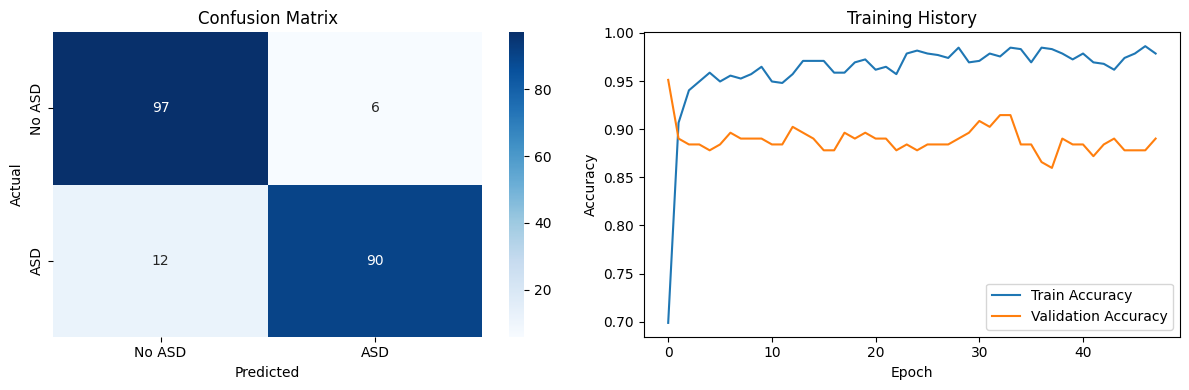

In [ ]:

# Handle Class Imbalance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Sigmoid Model Architecture
def build_sigmoid_model(input_shape):
    inputs = Input(shape=input_shape)

    x = Dense(256)(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.3)(x)

    x = Dense(128)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.2)(x)

    x = Dense(64)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.1)(x)

    outputs = Dense(1, activation='sigmoid')(x)

    return Model(inputs=inputs, outputs=outputs)

# Build and Compile Model
model = build_sigmoid_model((X_train.shape[1],))  # Notice the tuple format
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True),
    ModelCheckpoint('best_sigmoid_model.h5', save_best_only=True)
]

# Train Model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=64,
    validation_split=0.2,
    callbacks=callbacks,
    verbose=1
)

# Evaluate Model
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

# Generate Predictions
y_pred_probs = model.predict(X_test)
y_pred_classes = (y_pred_probs > 0.5).astype(int)

# Calculate Metrics
sigmoid_metrics = {
    'Accuracy (%)': accuracy_score(y_test, y_pred_classes) * 100,
    'Precision (%)': precision_score(y_test, y_pred_classes) * 100,
    'Recall (%)': recall_score(y_test, y_pred_classes) * 100,
    'F1 Score (%)': f1_score(y_test, y_pred_classes) * 100,
    'ROC AUC (%)': roc_auc_score(y_test, y_pred_probs) * 100,
    'Log Loss': log_loss(y_test, y_pred_probs),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_classes)
}

# Print Results
print(f"\nTraining Accuracy: {train_acc*100:.2f}%")
print(f"Testing Accuracy: {test_acc*100:.2f}%")
print("\nDetailed Metrics:")
for metric, value in sigmoid_metrics.items():
    if metric != 'Confusion Matrix':
        print(f"{metric}: {value:.2f}")

# Visualization
plt.figure(figsize=(12, 4))

# Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(metrics['Confusion Matrix'], annot=True, fmt="d", cmap="Blues",
            xticklabels=["No ASD", "ASD"], yticklabels=["No ASD", "ASD"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Training History
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training History')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

**COMPARISON METRICS**

In [ ]:
import pandas as pd

# Combine all model metrics
model_metrics = {
    'Batch Norm': batch_norm_metrics,
    'Dropout': dropout_metrics,
    'Dense': dense_metrics,
    'LSTM': lstm_metrics,
    'Residual': residual_metrics,
    'Sigmoid': sigmoid_metrics
}

# Convert to DataFrame
df_metrics = pd.DataFrame(model_metrics)

# Print metrics in tabular form
print("\nModel Evaluation Metrics:\n")
print(df_metrics.T)  # Transpose for better readability



Model Evaluation Metrics:

           Accuracy (%) Precision (%) Recall (%) F1 Score (%) ROC AUC (%)  \
Batch Norm    90.731707     88.181818  94.174757    91.079812   97.192081   
Dropout       90.243902          91.0  89.215686     90.09901    97.48715   
Dense         98.571429     97.297297  97.297297    97.297297    99.97376   
LSTM          89.268293     89.215686  89.215686    89.215686   97.039787   
Residual      94.285714      83.72093  97.297297         90.0   98.976647   
Sigmoid       94.285714     87.179487  91.891892    89.473684   99.002886   

            Log Loss      Confusion Matrix  
Batch Norm   0.25387   [[89, 13], [6, 97]]  
Dropout     0.240706   [[94, 9], [11, 91]]  
Dense       0.050992   [[102, 1], [1, 36]]  
LSTM        0.235943  [[92, 11], [11, 91]]  
Residual    0.154089    [[96, 7], [1, 36]]  
Sigmoid      0.12591    [[98, 5], [3, 34]]  
